# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
tf.__version__

'2.13.0'

### Set images saving path

In [3]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "ProjectImages")

# Create the directory if it does not exist
os.makedirs(IMAGES_PATH, exist_ok=True)

### Define function to save images in the specified path

In [4]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Seed numpy for reproducible results

In [5]:
np.random.seed(42)

# Importing the dataset

In [6]:
dataset = pd.read_csv('MergeConflictsDataset.csv', sep=';')

## Inspect the dataset

In [7]:
dataset.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26973 entries, 0 to 26972
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   commit           26973 non-null  object 
 1   parent1          26973 non-null  object 
 2   parent2          26973 non-null  object 
 3   ancestor         26972 non-null  object 
 4   is pr            26973 non-null  int64  
 5   added lines      26973 non-null  int64  
 6   deleted lines    26973 non-null  int64  
 7   devs parent1     26973 non-null  int64  
 8   devs parent2     26973 non-null  int64  
 9   time             26973 non-null  int64  
 10  nr files         26973 non-null  int64  
 11  added files      26973 non-null  int64  
 12  deleted files    26973 non-null  int64  
 13  renamed files    26973 non-null  int64  
 14  copied files     26973 non-null  int64  
 15  modified files   26973 non-null  int64  
 16  nr commits1      26973 non-null  int64  
 17  nr commits2 

In [9]:
dataset.describe()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
count,26973.000000,2.697300e+04,2.697300e+04,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,...,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000
mean,0.777741,4.255746e+02,2.504278e+02,4.656175,1.911801,240.714159,0.752048,2.431061,1.396545,0.970229,...,4.316205,0.955437,1.338857,0.096281,1.007860,51.391280,104.662551,69.455646,68.021095,0.054425
std,0.415772,8.887706e+03,1.027916e+04,12.230444,6.534316,908.382038,10.620490,67.840678,90.614277,64.245155,...,12.924317,3.203307,4.269666,0.541916,6.033535,34.560112,89.471017,40.057823,39.385369,0.226858
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000e+00,1.000000e+00,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,47.000000,41.000000,40.000000,0.000000
50%,1.000000,1.100000e+01,2.000000e+00,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,88.000000,66.391304,65.000000,0.000000
75%,1.000000,7.500000e+01,1.500000e+01,3.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,67.000000,131.000000,91.714286,90.000000,0.000000
max,1.000000,1.140945e+06,1.140456e+06,158.000000,182.000000,21513.000000,1152.000000,10404.000000,10396.000000,10398.000000,...,176.000000,48.000000,78.000000,16.000000,312.000000,1326.000000,1326.000000,1326.000000,1326.000000,1.000000


### Drop irrelevant columns such as name and identifiers about the commit tree

In [10]:
dataset.drop(columns=["commit", "parent1", "parent2", "ancestor"], inplace=True)

## Correlation heatmap matrix

Saving figure heatmap_correlation_with_conflict_raw


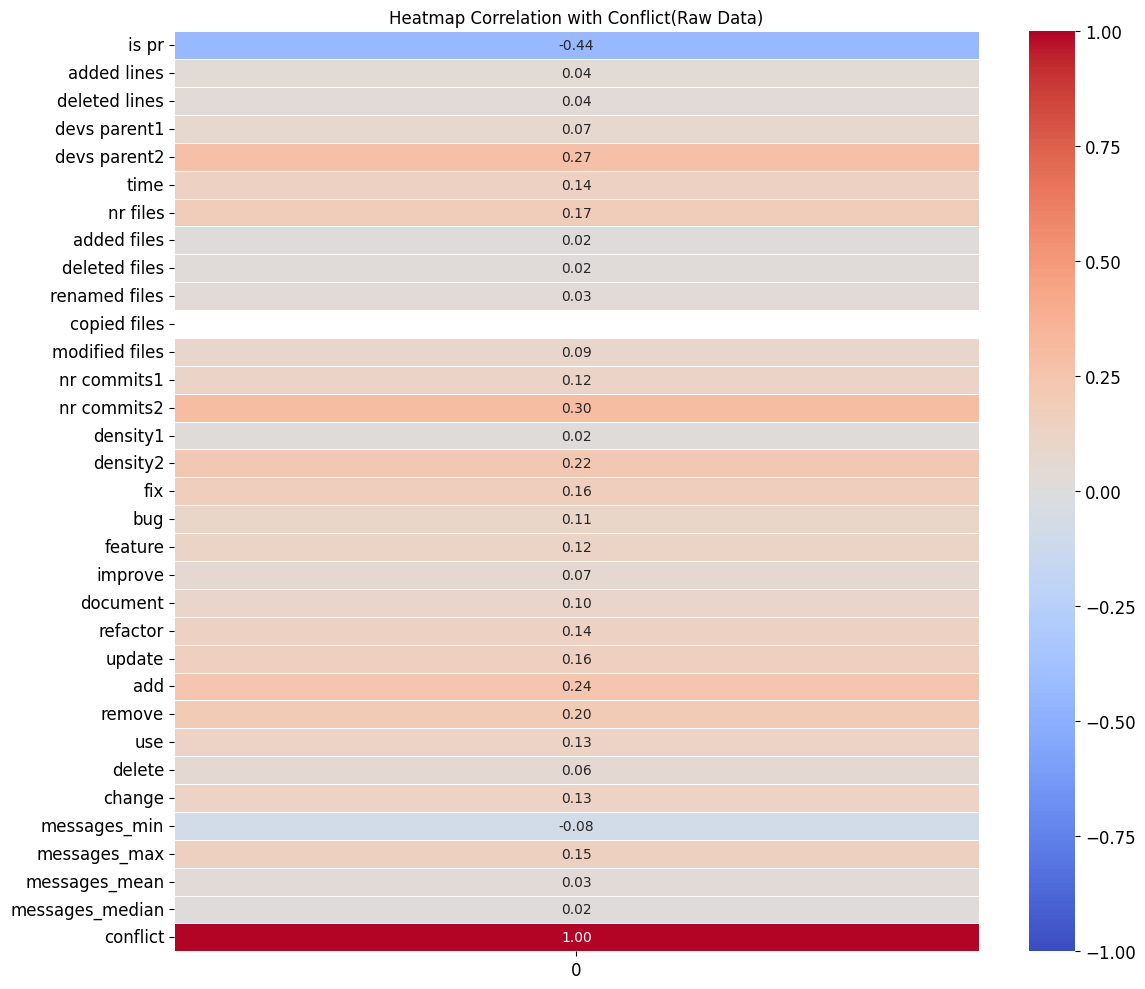

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_with_conflict = dataset.corrwith(dataset['conflict'])

plt.figure(figsize=(12, 10))
sns.heatmap(corr_with_conflict.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Heatmap Correlation with Conflict(Raw Data)')
save_fig("heatmap_correlation_with_conflict_raw")
plt.show()

##### Merge added lines and deleted lines into a single column "lines sum" by summing them

In [12]:
dataset["lines sum"] = dataset["added lines"] + dataset["deleted lines"]
dataset.drop(columns=["added lines", "deleted lines"], inplace=True)


##### Merge lines operations into a single column "files sum" by summing them

In [13]:
dataset["files sum"] = dataset["added files"] + dataset["deleted files"] + dataset["modified files"] + dataset["renamed files"] + dataset["copied files"]
dataset.drop(columns=["added files", "deleted files", "modified files", "renamed files", "copied files"], inplace=True)

##### Merge devs into a single column "devs sum" by summing them

In [14]:
dataset["devs sum"] = dataset["devs parent1"] + dataset["devs parent2"]
dataset.drop(columns=["devs parent1", "devs parent2"], inplace=True)

##### Merge commits into a single column "commits sum" by summing them

In [15]:
dataset["commits sum"] = dataset["nr commits1"] + dataset["nr commits2"]
dataset.drop(columns=["nr commits1", "nr commits2"], inplace=True)

##### Merge densities into a single column "densities sum" by summing them

In [16]:
dataset["densities sum"] = dataset["density1"] + dataset["density2"]
dataset.drop(columns=["density1", "density2"], inplace=True)

##### Merge messages_mean and messages_median into a single balanced column by averaging them

In [17]:
dataset["messages mean_median avg"] = (dataset["messages_mean"] + dataset["messages_median"]) / 2
dataset.drop(columns=["messages_mean", "messages_median"], inplace=True)

##### Reorder the compacted columns into their original places

In [18]:
# Keep every column where it is, but insert the newly modified columns from the beginning
new_columns_order = [
    'lines sum', 
    'files sum', 
    'devs sum', 
    'commits sum', 
    'densities sum', 
    'messages mean_median avg'
    ]

current_columns = dataset.columns.tolist()

for col in current_columns:
    if col not in new_columns_order:
        new_columns_order.append(col)
        
dataset = dataset[new_columns_order]


## Correlation heatmap matrix after simplifications

Saving figure heatmap_correlation_with_conflict_merged


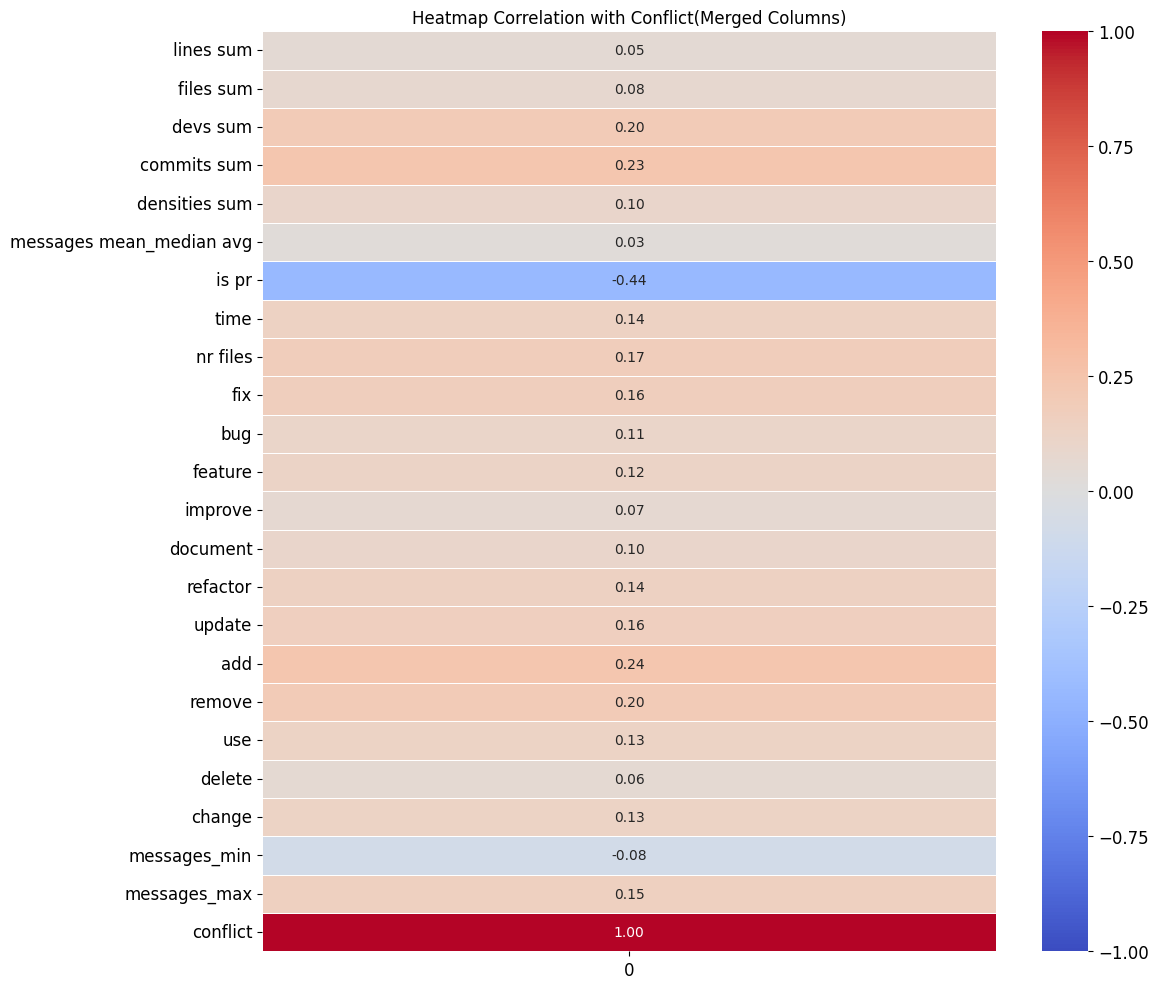

In [19]:
corr_with_conflict = dataset.corrwith(dataset['conflict'])

plt.figure(figsize=(12, 10))
sns.heatmap(corr_with_conflict.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Heatmap Correlation with Conflict(Merged Columns)')
save_fig("heatmap_correlation_with_conflict_merged")
plt.show()

### Drop columns that have a very low impact on the dependent variable

In [20]:
# Step 1: Calculate the correlation with 'conflict'
corr_with_conflict = dataset.corrwith(dataset['conflict'])

# Step 2: Define the threshold range and identify columns to drop
threshold = 0.1
columns_to_drop = corr_with_conflict[(-threshold <= corr_with_conflict) & (corr_with_conflict <= threshold)].index

# Step 3: Drop the identified columns from the DataFrame
dataset.drop(columns=columns_to_drop, inplace=True)

#### Show correlation matrix after even more simplifications

Saving figure heatmap_correlation_with_conflict_merged_thresholded


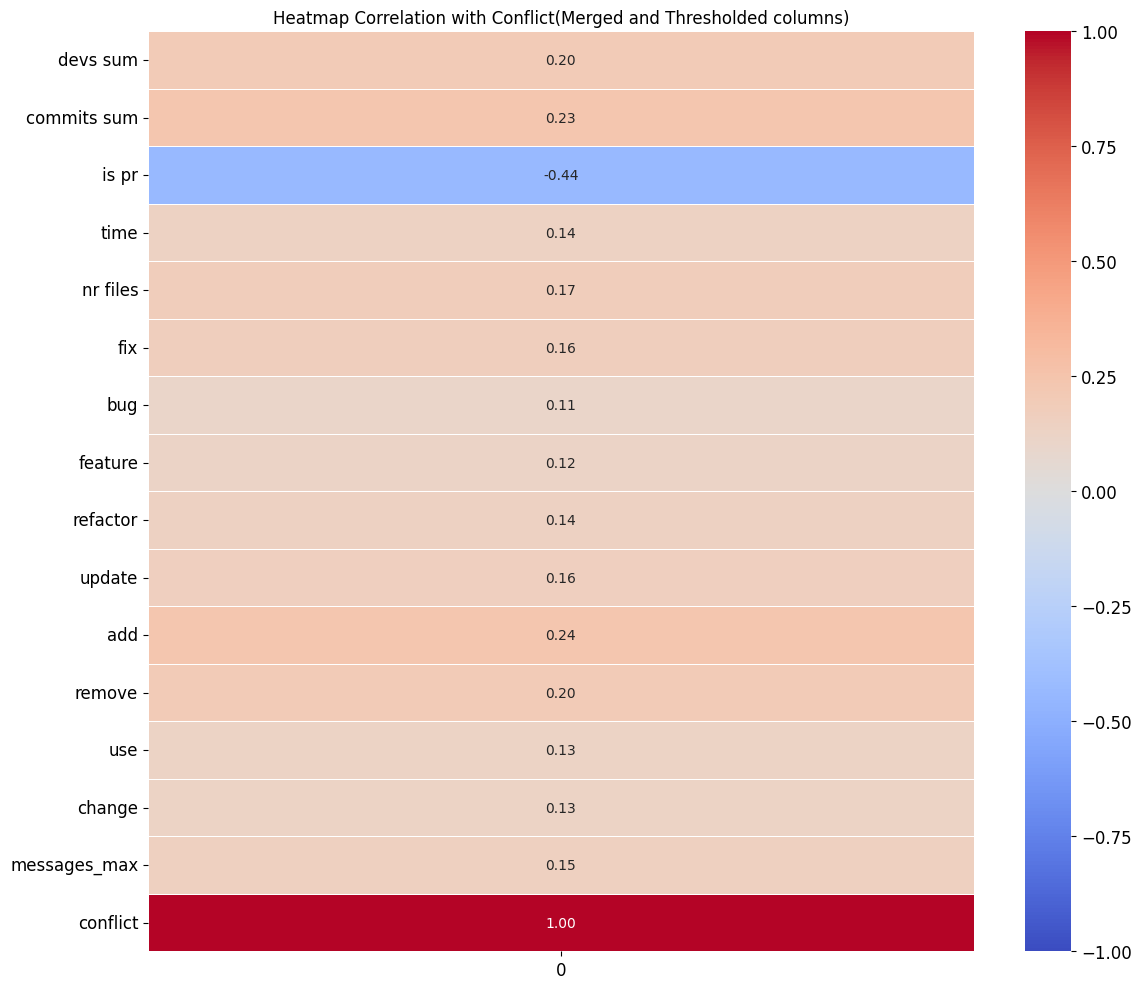

In [21]:
corr_with_conflict = dataset.corrwith(dataset['conflict'])

plt.figure(figsize=(12, 10))
sns.heatmap(corr_with_conflict.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Heatmap Correlation with Conflict(Merged and Thresholded columns)')
save_fig("heatmap_correlation_with_conflict_merged_thresholded")
plt.show()

## Split dataset into independent and dependent variables

In [22]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Inspect the dependent and independent variable(s)

In [23]:
print(X)

[[  1   5   1 ...   0   0  65]
 [  3  49   0 ...   0   0 117]
 [  1   1   1 ...   0   0  18]
 ...
 [  1   2   1 ...   0   0  58]
 [  1   1   1 ...   0   0   8]
 [  1   1   1 ...   0   0  23]]


In [24]:
print(y)

[0 1 0 ... 0 0 0]


# Handle missing values

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :])
X[:, :] = imputer.transform(X[:, :])

# Splitting the dataset into training, validation and test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


# Feature scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Build a sequential Artificial Neural Network and populate the input layer with the compacted independent variables. Tweak the complexity of the neural network based on the results obtained until a great model is found.

### Define a function to create the model each time(useful for K-fold cross validation)

In [28]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(12, activation='relu'),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])
    return model
ann = create_model()

# Train the ANN

##### Train the ANN on the training partition taking 32 observations at a time in a batch, for 10 epochs

633/633 [==============================] - 0s 440us/step


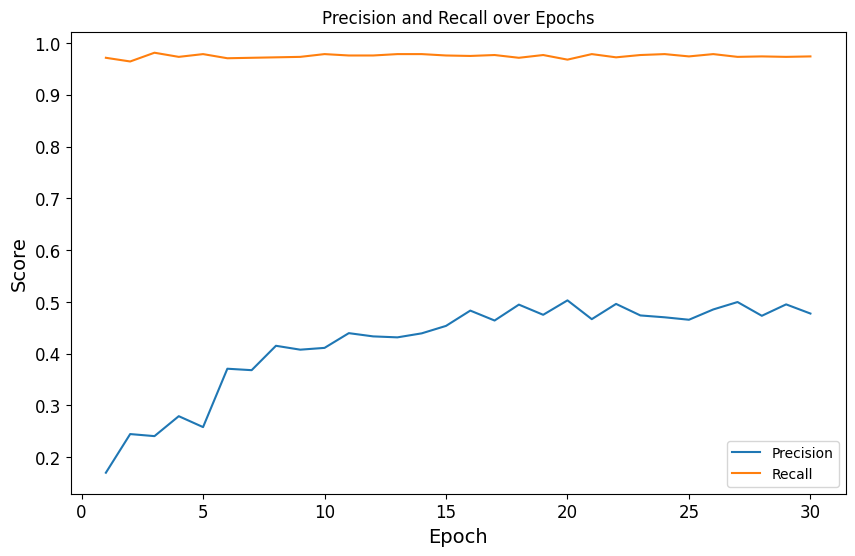

In [29]:
from tensorflow.keras import metrics

threshold = 0.05

# Initialize lists to store precision and recall values
precision_values = []
recall_values = []

# Initialize precision and recall metrics
precision_metric = metrics.Precision()
recall_metric = metrics.Recall()

for epoch in range(30):
    # Fit the model for one epoch
    ann.fit(X_train, y_train, batch_size=32, epochs=1, verbose=0)
    
    # Predict the labels
    y_pred = ann.predict(X_train, batch_size=32, verbose=1)
    # Set a custom threshold
    threshold = 0.05

    # Adjust the predictions based on the custom threshold
    y_pred = (y_pred > threshold).astype('int32')
    
    # Update the metrics with the new predictions
    precision_metric.update_state(y_train, y_pred)
    recall_metric.update_state(y_train, y_pred)
    
    # Calculate the current precision and recall values
    precision = precision_metric.result().numpy()
    recall = recall_metric.result().numpy()
    
    # Reset the metrics for the next epoch
    precision_metric.reset_states()
    recall_metric.reset_states()
    
    # Store the precision and recall values
    precision_values.append(precision)
    recall_values.append(recall)

# Plot precision and recall over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), precision_values, label='Precision')
plt.plot(range(1, 31), recall_values, label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Precision and Recall over Epochs')
plt.legend()
plt.show()

### Perform K-Fold Cross Validation with k=5 to estimate model performance on unseen data in a more generalized manner

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score

k_folds = 5

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

accuracy_scores = []
recall_scores = []
precision_scores = []

for i, (train_index, val_index) in enumerate(kf.split(X), 1):
    print(f"Iteration {i}/{k_folds}:")
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    model = create_model()
    
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)
    
    val_preds = (model.predict(X_val) > threshold).astype("int32")
    accuracy = accuracy_score(y_val, val_preds)
    recall = recall_score(y_val, val_preds)
    precision = precision_score(y_val, val_preds, zero_division=0)
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    precision_scores.append(precision)
    
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - Recall: {recall:.4f}")
    print(f"  - Precision: {precision:.4f}")

mean_accuracy = np.mean(accuracy_scores)
mean_recall = np.mean(recall_scores)
mean_precision = np.mean(precision_scores)
std_accuracy = np.std(accuracy_scores)
std_recall = np.std(recall_scores)
std_precision = np.std(precision_scores)
print("\nPerformance Summary:")
print("Mean Accuracy:", mean_accuracy)
print("Mean Recall:", mean_recall)
print("Mean Precision:", mean_precision)
print("Standard Deviation(accuracy):", std_accuracy)
print("Standard Deviation(recall):", std_recall)
print("Standard Deviation(precision):", std_precision)

Iteration 1/5:
169/169 [==============================] - 0s 452us/step
  - Accuracy: 0.9303
  - Recall: 0.9639
  - Precision: 0.4461
Iteration 2/5:
169/169 [==============================] - 0s 456us/step
  - Accuracy: 0.8780
  - Recall: 0.9694
  - Precision: 0.3051
Iteration 3/5:
169/169 [==============================] - 0s 432us/step
  - Accuracy: 0.8647
  - Recall: 0.9831
  - Precision: 0.2864
Iteration 4/5:
169/169 [==============================] - 0s 429us/step
  - Accuracy: 0.9286
  - Recall: 0.9552
  - Precision: 0.4268
Iteration 5/5:
169/169 [==============================] - 0s 441us/step
  - Accuracy: 0.8914
  - Recall: 0.9859
  - Precision: 0.3240

Performance Summary:
Mean Accuracy: 0.8986031505159854
Mean Recall: 0.9714936855228773
Mean Precision: 0.3577078598786999
Standard Deviation(accuracy): 0.026578041541536052
Standard Deviation(recall): 0.011570752506424054
Standard Deviation(precision): 0.06568552977416106


### Plot precision vs recall on the K folds

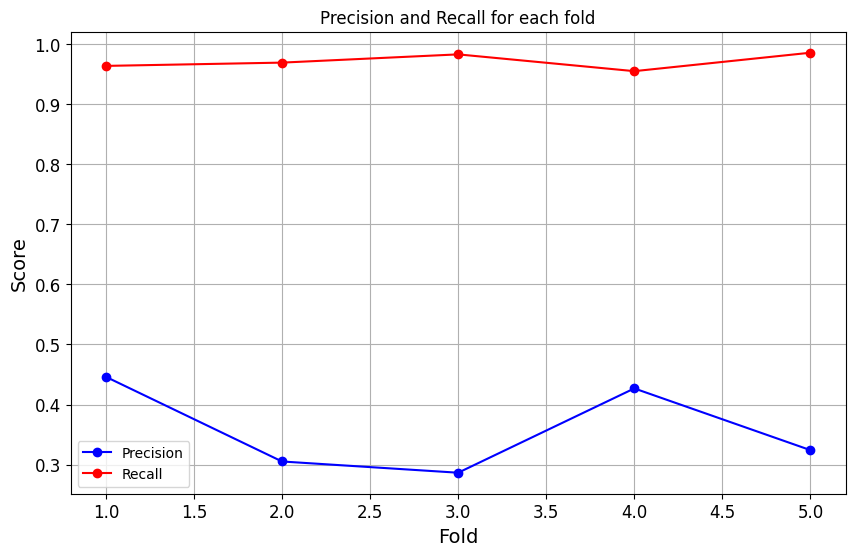

In [31]:
import matplotlib.pyplot as plt

# Create a range of values representing the fold number
folds = range(1, k_folds + 1)

plt.figure(figsize=(10, 6))

# Plot precision scores
plt.plot(folds, precision_scores, marker='o', linestyle='-', color='b', label='Precision')

# Plot recall scores
plt.plot(folds, recall_scores, marker='o', linestyle='-', color='r', label='Recall')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Precision and Recall for each fold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Try to predict results of the test set(convert y_pred from probabilities into 0 or 1)
### Trade precision for better recall using a different threshold other than 0.5

In [32]:
y_pred = ann.predict(X_test)
y_pred = [1 if pred > threshold else 0 for pred in y_pred]
y_pred = np.array(y_pred)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

211/211 [==============================] - 0s 501us/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


### Making the confusion matrix(convert probabilities given by model into either 0 or 1)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = 2 * (precision * recall) / (precision + recall)
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

[[6004  396]
 [   6  338]]
Recall: 0.9825581395348837
Precision: 0.4604904632152589
F1 Score: 0.62708719851577
Accuracy: 0.9403914590747331
